In [1]:
"""
This notebook introduces the sigmoid function,
gradient descent with logistic regression, and
generating predictions using a trained classifier
"""

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fmin_tnc

sns.set_context('notebook')
sns.set_style('white') #white
#plt.style.use('ggplot') #red
#plt.style.use('fivethirtyeight') #blue
plt.xkcd()

In [2]:
data = np.loadtxt('ex2data1.txt', delimiter=',', unpack=True)

# Initialize feature and label data
X = np.transpose(np.array(data[:-1]))
y = np.transpose(np.array(data[-1:]))
m = y.size

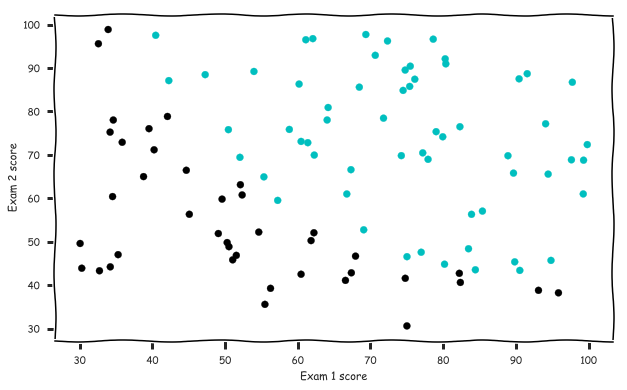

In [3]:
# Plotting data
plt.figure(figsize=(10, 6))

colors = ['c' if i == 1 else 'k' for i in y]
plt.scatter(X[:, 0], X[:, 1], color=colors)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

In [4]:
# Initialize variables
m, n = X.shape
X = np.insert(X, 0, 1, axis=1)
theta_init = np.zeros((n+1, 1))

In [5]:
# Logistic regression cost function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costFunction(theta, X, y):
    """Logistic regression cost function"""
    m = y.size
    theta = theta.reshape((X.shape[1], 1))
    hypothesis = sigmoid(X @ theta)
    J = -1/m * (y.T @ np.log(hypothesis) + (1 - y).T @ np.log(1 - hypothesis))
    return J

def gradFunction(theta, X, y):
    """Logistic regression gradient"""
    m = y.size
    theta = theta.reshape((X.shape[1], 1))
    hypothesis = sigmoid(X @ theta)
    grad = 1/m * (X.T @ (hypothesis - y))
    return grad

cost = costFunction(theta_init, X, y)
grad = gradFunction(theta_init, X, y)

print('Logistic regression cost with initial theta: \n{}\n Gradient:\n{}\n'.format(float(cost), grad))

Logistic regression cost with initial theta: 
0.6931471805599453
 Gradient:
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]



In [6]:
# Find minimum of cost function
#res = minimize(costFunction, theta_init, args=(X, y), method=None, jac=False, options={ 'maxiter':400})
result = fmin_tnc(func=costFunction, x0=theta_init, fprime=gradFunction, args=(X, y))
theta = result[0]
print('Minimized theta: \n{}'.format(theta))

Minimized theta: 
[-25.16131866   0.20623159   0.20147149]


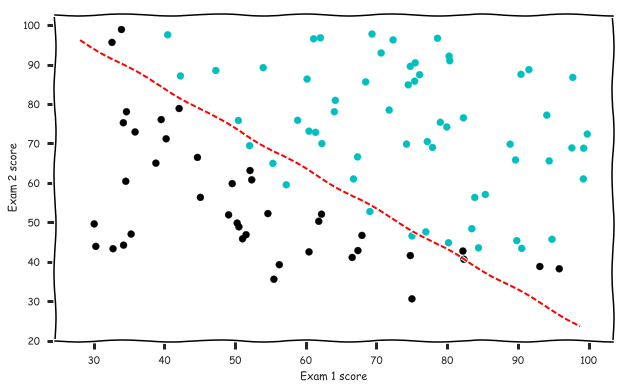

In [7]:
# Plot decision boundary

# Plotting data
plt.figure(figsize=(10, 6))

plt.scatter(X[:, 1], X[:, 2], color=colors)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# Decision boundary
plot_x = np.array([X[:, 1].min() - 2, X[:, 1].max() - 1])
plot_y = (theta[0] + theta[1] * plot_x) * -1/theta[2]

plt.plot(plot_x, plot_y, 'r--')

In [8]:
# Generating predictions

def predict(theta, X):
    """Given a set of features X and theta, predict Y"""
    p = np.around(sigmoid(X @ theta))
    return p.reshape((len(p), 1))

# Probability of a student with a 45 on exam 1 and 85 on exam 2 getting admitted
prob = sigmoid(np.array([1, 45, 85]) @ theta) * 100
print('A student with a score of 45 and 85 has a %.2f%% chance of getting admitted\n' % prob)

# Accuracy of learning algorithm
p = predict(theta, X)
accuracy = np.mean(p == y) * 100
#accuracy = (sum(map(int, correct)) % len(correct)) 
print('Accuracy of logistic regression = {}'.format(accuracy))


A student with a score of 45 and 85 has a 77.63% chance of getting admitted

Accuracy of logistic regression = 89.0
